✅ Titanic dataset loaded successfully!
   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                       

/var/folders/md/4wbpyvxx0rj1dhxpd_bhy8gm0000gn/T/ipykernel_3119/924766866.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/var/folders/md/4wbpyvxx0rj1dhxpd_bhy8gm0000gn/T/ipykernel_3119/924766866.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

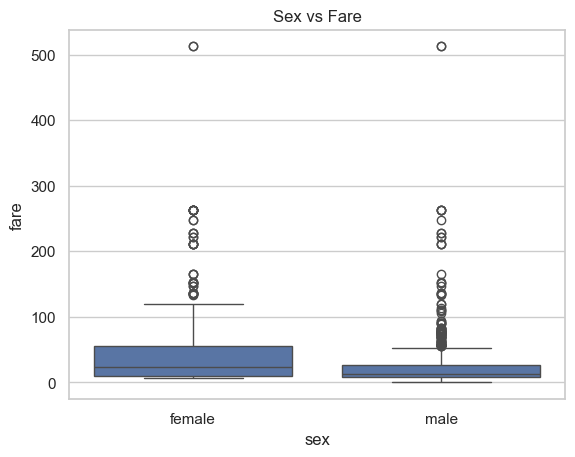

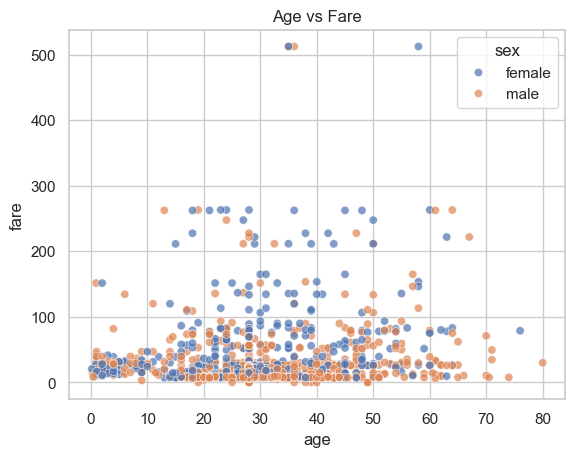

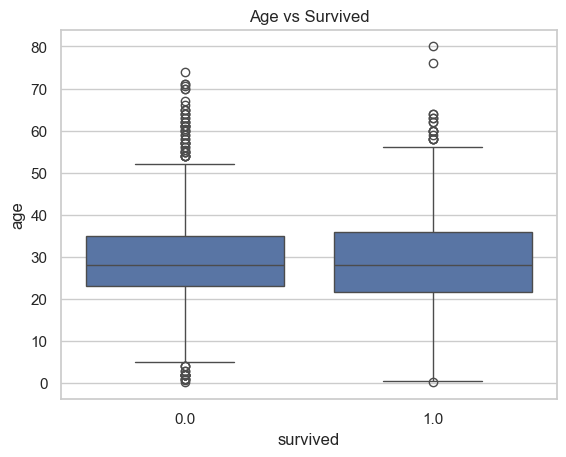

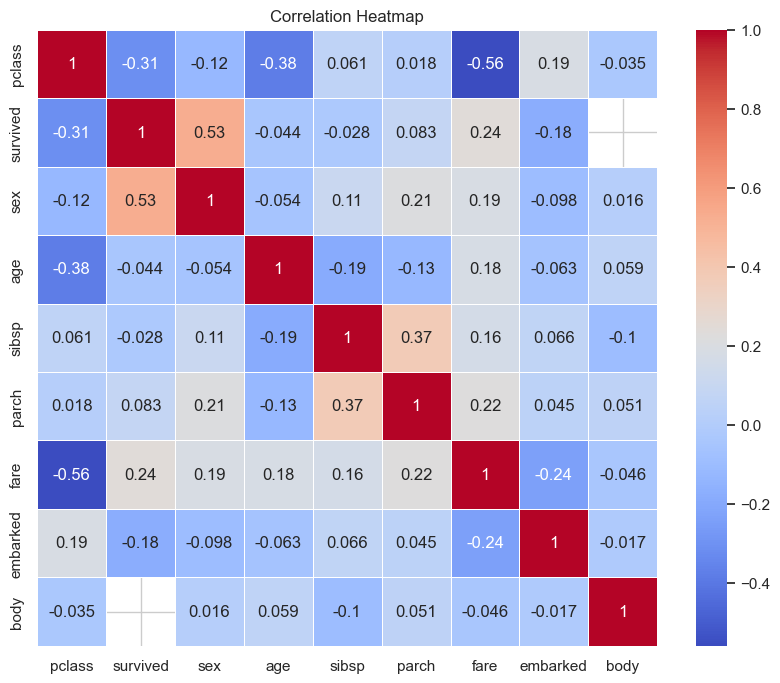

✅ All visualizations completed successfully!


In [3]:
# titanic_visuals.py

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for nice visuals
sns.set(style='whitegrid')

# -------------------------------
# 1. Load the dataset
# -------------------------------
df = pd.read_csv('titanic3.csv')

print("✅ Titanic dataset loaded successfully!")
print(df.head(), "\n")

# -------------------------------
# 2. Data Cleaning
# -------------------------------
# Standardize column names
df.columns = [col.lower() for col in df.columns]

# Drop unnecessary columns
for col in ['deck', 'embark_town', 'alive']:
    if col in df.columns:
        df.drop(columns=col, inplace=True, errors='ignore')

# Fill missing numeric values
if 'age' in df.columns:
    df['age'].fillna(df['age'].median(), inplace=True)
if 'fare' in df.columns:
    df['fare'].fillna(df['fare'].median(), inplace=True)

# Fill categorical values
if 'embarked' in df.columns:
    df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

print("✅ Missing values handled.\n")

# -------------------------------
# 3. Visualizations
# -------------------------------

# Sex vs Fare
sns.boxplot(x='sex', y='fare', data=df)
plt.title('Sex vs Fare')
plt.show()

# Age vs Fare
sns.scatterplot(x='age', y='fare', hue='sex', data=df, alpha=0.7)
plt.title('Age vs Fare')
plt.show()

# Age vs Survived
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs Survived')
plt.show()

# -------------------------------
# 4. Correlation Heatmap
# -------------------------------
df_num = df.copy()

# Convert categorical to numeric
if 'sex' in df_num.columns:
    df_num['sex'] = df_num['sex'].map({'male': 0, 'female': 1})
if 'embarked' in df_num.columns:
    df_num['embarked'] = df_num['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

corr = df_num.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print("✅ All visualizations completed successfully!")


In [4]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys
print(sys.executable)


/Users/loreenmusiyiwa/ENTER/envs/myenv/bin/python
